In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushsharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading the datasheet

In [2]:
url = f'https://docs.google.com/spreadsheets/d/1vKAIohc1IYOc6E3Y2YLRzAgLcwswKrSKLXX2J47rhjE/gviz/tq?tqx=out:csv&sheet=Updated_Data_Sheet'

In [40]:
import pandas as pd

df = pd.read_csv(url)

In [41]:
df.head()

,LinkedInMemberId,FirstName,LastName,Title,Company,Occupation,Email,Phone,Location(original),Location,...,Company Description,Social Footprint,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,1074760800,scott,chen,CEO,SocialEpoch,傲途SocialEpoch- Founder & CEO| SocialSelling Ex...,NaN,NaN,Singapore,Asia,...,We are a B2B social selling solutions provider...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1021300140,Leon,Lyu,CEO,ANTPOOL Tech,Chief Executive Officer at ANTPOOL Tech,leonlv2028@gmail.com,NaN,Singapore,Asia,...,"ANTPOOL, as a blockchain infrastructure compan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005651311,Dmytro,Fedorchuk,CEO,ABM Cloud,CEOABM Loyalty – ABM Cloud,fedd@abmcloud.com,NaN,Ukraine,East Europe,...,Innovative company providing professional IT s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,888693775,Philipp,Wellstein,CEO,WellDev,Chief Executive Officer at WellDev,NaN,NaN,Switzerland,West Europe,...,"We offer innovative, high performing and custo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875019298,Francesca,Turchi,CEO,Hermes Trade,Chief Executive Officer presso Hermes Trade & ...,NaN,NaN,Italy,West Europe,...,Better together: we provide you with a team of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
def remove_first_two_words(text):
    words = text.split()
    if len(words) >= 2:
        return ' '.join(words[2:])
    else:
        return text

# Apply the function to the DataFrame column
df['TextColumn'] = df['Company Description'].apply(remove_first_two_words)

# Print the updated DataFrame
df.head()

,LinkedInMemberId,FirstName,LastName,Title,Company,Occupation,Email,Phone,Location(original),Location,...,Social Footprint,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,TextColumn
0,1074760800,scott,chen,CEO,SocialEpoch,傲途SocialEpoch- Founder & CEO| SocialSelling Ex...,NaN,NaN,Singapore,Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"a B2B social selling solutions provider, dedic..."
1,1021300140,Leon,Lyu,CEO,ANTPOOL Tech,Chief Executive Officer at ANTPOOL Tech,leonlv2028@gmail.com,NaN,Singapore,Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"a blockchain infrastructure company, believes ..."
2,1005651311,Dmytro,Fedorchuk,CEO,ABM Cloud,CEOABM Loyalty – ABM Cloud,fedd@abmcloud.com,NaN,Ukraine,East Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,providing professional IT services in developi...
3,888693775,Philipp,Wellstein,CEO,WellDev,Chief Executive Officer at WellDev,NaN,NaN,Switzerland,West Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"innovative, high performing and customer-centr..."
4,875019298,Francesca,Turchi,CEO,Hermes Trade,Chief Executive Officer presso Hermes Trade & ...,NaN,NaN,Italy,West Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,we provide you with a team of two or more digi...


In [43]:
data = pd.DataFrame()
columns_to_copy = ['Title', 'Location', 'Number of employees', 'Industry Classification', 'compute_rev_num', 'Job function', 'Primary Industry','Number of loc','Business model','TextColumn','Status']

for col in columns_to_copy:
    data[col] = df[col]

## Columns under consideration

In [44]:
data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,CEO,Asia,28,Product,420000,Executive Management,Software Development,3,B2B,"a B2B social selling solutions provider, dedic...",MEMBER_INVITATION_WITHDRAWN
1,CEO,Asia,17,Service,1122000,Executive Management,IT Services and Consulting,1,B2B,"a blockchain infrastructure company, believes ...",MEMBER_CONNECTED
2,CEO,East Europe,137,Service,12330000,Executive Management,IT Services and Consulting,1,B2B,providing professional IT services in developi...,MEMBER_CONNECTED
3,CEO,West Europe,111,Service,15540000,Executive Management,Software Development,3,B2B,"innovative, high performing and customer-centr...",MEMBER_INVITATION_WITHDRAWN
4,CEO,West Europe,69,Service,9660000,Executive Management,IT Services and Consulting,1,B2B,we provide you with a team of two or more digi...,MEMBER_INVITATION_WITHDRAWN


## One hot encoding of the Y(Status) column

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# One hot encoding of the 'Status' column
custom_mapping = {
    'MEMBER_CONNECTED': 1,
    'MEMBER_INVITATION_WITHDRAWN': 0,
}

# Using map() function
data['Status'] = data['Status'].map(custom_mapping)

# Using replace() method
data['Status'] = data['Status'].replace(custom_mapping)

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,CEO,Asia,28,Product,420000,Executive Management,Software Development,3,B2B,"a B2B social selling solutions provider, dedic...",0
1,CEO,Asia,17,Service,1122000,Executive Management,IT Services and Consulting,1,B2B,"a blockchain infrastructure company, believes ...",1
2,CEO,East Europe,137,Service,12330000,Executive Management,IT Services and Consulting,1,B2B,providing professional IT services in developi...,1
3,CEO,West Europe,111,Service,15540000,Executive Management,Software Development,3,B2B,"innovative, high performing and customer-centr...",0
4,CEO,West Europe,69,Service,9660000,Executive Management,IT Services and Consulting,1,B2B,we provide you with a team of two or more digi...,0


In [9]:
custom_mapping = {
    'B2B': 1,
    'B2C': 0,
}

# Using map() function
data['Business model'] = data['Business model'].map(custom_mapping)

# Using replace() method
data['Business model'] = data['Business model'].replace(custom_mapping)

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,CEO,Asia,28,Product,420000,Executive Management,Software Development,3,1,"a B2B social selling solutions provider, dedic...",0
1,CEO,Asia,17,Service,1122000,Executive Management,IT Services and Consulting,1,1,"a blockchain infrastructure company, believes ...",1
2,CEO,East Europe,137,Service,12330000,Executive Management,IT Services and Consulting,1,1,providing professional IT services in developi...,1
3,CEO,West Europe,111,Service,15540000,Executive Management,Software Development,3,1,"innovative, high performing and customer-centr...",0
4,CEO,West Europe,69,Service,9660000,Executive Management,IT Services and Consulting,1,1,we provide you with a team of two or more digi...,0


## One hot encoding of the Industry classification column

In [10]:
# One hot encoding of the 'Industry Classification' column

custom_mapping = {
    'Product': 1,
    'Service': 0,
}

# Using map() function
data['Industry Classification'] = data['Industry Classification'].map(custom_mapping)

# Using replace() method
data['Industry Classification'] = data['Industry Classification'].replace(custom_mapping)

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,CEO,Asia,28,1,420000,Executive Management,Software Development,3,1,"a B2B social selling solutions provider, dedic...",0
1,CEO,Asia,17,0,1122000,Executive Management,IT Services and Consulting,1,1,"a blockchain infrastructure company, believes ...",1
2,CEO,East Europe,137,0,12330000,Executive Management,IT Services and Consulting,1,1,providing professional IT services in developi...,1
3,CEO,West Europe,111,0,15540000,Executive Management,Software Development,3,1,"innovative, high performing and customer-centr...",0
4,CEO,West Europe,69,0,9660000,Executive Management,IT Services and Consulting,1,1,we provide you with a team of two or more digi...,0


## Numerical encoding of the Location column

In [11]:
# categorical encoding of the 'Location' column

custom_mapping = {
    'North America': 1,
    'Asia': 2,
    'West Europe': 3,
    'East Europe': 4
}

# Using map() function
data['Location'] = data['Location'].map(custom_mapping)

# Using replace() method
data['Location'] = data['Location'].replace(custom_mapping)

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,CEO,2,28,1,420000,Executive Management,Software Development,3,1,"a B2B social selling solutions provider, dedic...",0
1,CEO,2,17,0,1122000,Executive Management,IT Services and Consulting,1,1,"a blockchain infrastructure company, believes ...",1
2,CEO,4,137,0,12330000,Executive Management,IT Services and Consulting,1,1,providing professional IT services in developi...,1
3,CEO,3,111,0,15540000,Executive Management,Software Development,3,1,"innovative, high performing and customer-centr...",0
4,CEO,3,69,0,9660000,Executive Management,IT Services and Consulting,1,1,we provide you with a team of two or more digi...,0


In [12]:
custom_mapping = {
  'Software Development':1,
	'IT Services and Consulting':2,
	'Business Intelligence':3,
	'Civic and Social Organizations':4,
	'Data Infrastructure':5,
	'Cybersecurity':6,
	'Telecommunications':7,
	'Marketing Services':8,
	'Web3':9,
	'Embedded Software':10,
	'Finance':11

}

# Using map() function
data['Primary Industry'] = data['Primary Industry'].map(custom_mapping)

# Using replace() method
data['Primary Industry'] = data['Primary Industry'].replace(custom_mapping)

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,CEO,2,28,1,420000,Executive Management,1,3,1,"a B2B social selling solutions provider, dedic...",0
1,CEO,2,17,0,1122000,Executive Management,2,1,1,"a blockchain infrastructure company, believes ...",1
2,CEO,4,137,0,12330000,Executive Management,2,1,1,providing professional IT services in developi...,1
3,CEO,3,111,0,15540000,Executive Management,1,3,1,"innovative, high performing and customer-centr...",0
4,CEO,3,69,0,9660000,Executive Management,2,1,1,we provide you with a team of two or more digi...,0


## Numercial encoding of the title column

In [13]:
# categorical encoding of the 'Title' column

custom_mapping = {
    'CEO': 1,
    'Founder': 2,
    'Co-Founder': 3,
    'CRO/CSO': 4,
    'Non Exec/Op Exec': 5,
    'Operations Exec': 5,

}

# Using map() function
data['Title'] = data['Title'].map(custom_mapping)

# Using replace() method
data['Title'] = data['Title'].replace(custom_mapping)

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Job function,Primary Industry,Number of loc,Business model,TextColumn,Status
0,1,2,28,1,420000,Executive Management,1,3,1,"a B2B social selling solutions provider, dedic...",0
1,1,2,17,0,1122000,Executive Management,2,1,1,"a blockchain infrastructure company, believes ...",1
2,1,4,137,0,12330000,Executive Management,2,1,1,providing professional IT services in developi...,1
3,1,3,111,0,15540000,Executive Management,1,3,1,"innovative, high performing and customer-centr...",0
4,1,3,69,0,9660000,Executive Management,2,1,1,we provide you with a team of two or more digi...,0


In [14]:
data.drop(columns='Job function', inplace=True)

In [15]:
data.columns

Index(['Title', 'Location', 'Number of employees', 'Industry Classification',
       'compute_rev_num', 'Primary Industry', 'Number of loc',
       'Business model', 'TextColumn', 'Status'],
      dtype='object')

## Numerical encoding and binning of the variable column(employees)

In [16]:
#binning of the number of employees

import pandas as pd

emp = data['Number of employees']

# Define the bin edges
bin_edges = [1, 40, 50, 100, 5000]

data['Number of employees'] = pd.cut(data['Number of employees'], bins=bin_edges, labels=[1,2,3,4])

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Primary Industry,Number of loc,Business model,TextColumn,Status
0,1,2,1,1,420000,1,3,1,"a B2B social selling solutions provider, dedic...",0
1,1,2,1,0,1122000,2,1,1,"a blockchain infrastructure company, believes ...",1
2,1,4,4,0,12330000,2,1,1,providing professional IT services in developi...,1
3,1,3,4,0,15540000,1,3,1,"innovative, high performing and customer-centr...",0
4,1,3,3,0,9660000,2,1,1,we provide you with a team of two or more digi...,0


In [17]:
import pandas as pd

# emp = data['bins']

# Define the bin edges
bin_edges = [50000, 5000000, 10000000, 25000000, 50000000, 1000000000]

# Perform binning using cut() and create a new column 'Bins'
data['compute_rev_num'] = pd.cut(data['compute_rev_num'], bins=bin_edges, labels=[1,2,3,4,5])

data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Primary Industry,Number of loc,Business model,TextColumn,Status
0,1,2,1,1,1,1,3,1,"a B2B social selling solutions provider, dedic...",0
1,1,2,1,0,1,2,1,1,"a blockchain infrastructure company, believes ...",1
2,1,4,4,0,3,2,1,1,providing professional IT services in developi...,1
3,1,3,4,0,3,1,3,1,"innovative, high performing and customer-centr...",0
4,1,3,3,0,2,2,1,1,we provide you with a team of two or more digi...,0


In [18]:
data.dtypes

Title                         int64
Location                      int64
Number of employees        category
Industry Classification       int64
compute_rev_num            category
Primary Industry              int64
Number of loc                 int64
Business model                int64
TextColumn                   object
Status                        int64
dtype: object

In [19]:
data['Title'] = data['Title'].astype('float')
data['Number of employees'] = data['Number of employees'].astype('float')
data['compute_rev_num'] = data['compute_rev_num'].astype('float')
data['Business model'] = data['Business model'].astype('float')
data['Primary Industry'] = data['Primary Industry'].astype('float')

data['Location'] = data['Location'].astype('float')
data['Industry Classification'] = data['Industry Classification'].astype('float')
data['Number of loc'] = data['Number of loc'].astype('float')

data['Status'] = data['Status'].astype('float')


In [20]:
data.dtypes

Title                      float64
Location                   float64
Number of employees        float64
Industry Classification    float64
compute_rev_num            float64
Primary Industry           float64
Number of loc              float64
Business model             float64
TextColumn                  object
Status                     float64
dtype: object

In [21]:
data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Primary Industry,Number of loc,Business model,TextColumn,Status
0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,"a B2B social selling solutions provider, dedic...",0.0
1,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,"a blockchain infrastructure company, believes ...",1.0
2,1.0,4.0,4.0,0.0,3.0,2.0,1.0,1.0,providing professional IT services in developi...,1.0
3,1.0,3.0,4.0,0.0,3.0,1.0,3.0,1.0,"innovative, high performing and customer-centr...",0.0
4,1.0,3.0,3.0,0.0,2.0,2.0,1.0,1.0,we provide you with a team of two or more digi...,0.0


In [22]:
# data.to_csv('test.csv')
data.tail()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Primary Industry,Number of loc,Business model,TextColumn,Status
552,2.0,3.0,4.0,0.0,3.0,1.0,4.0,1.0,the leading provider and most widely deployed ...,0.0
553,1.0,3.0,4.0,0.0,4.0,2.0,2.0,1.0,"the UK’s most accredited, pureplay, Microsoft ...",0.0
554,1.0,3.0,3.0,0.0,3.0,2.0,2.0,1.0,"forefront of innovation, Opportunity has been ...",1.0
555,3.0,3.0,3.0,0.0,3.0,1.0,2.0,1.0,the specialty coffee industry's #1 software so...,0.0
556,1.0,3.0,4.0,0.0,4.0,2.0,1.0,1.0,a trusted IT Services company that supports gr...,0.0


## MODEL BUILDING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
X = np.array(data[['Title', 'Location', 'Number of employees', 'Industry Classification', 'compute_rev_num', 'Primary Industry','Number of loc','Business model','cluster']])
y = np.array(data['Status'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print("Training X:",len(X_train),"Testing X: ",len(X_test),"Training y: ",len(y_train))

Training X: 445 Testing X:  112 Training y:  445


## Logistic Regression

In [80]:
logistic_model = LogisticRegression()

clf = logistic_model.fit(X_train, y_train)

In [81]:
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6071428571428571
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.96      0.75        68
         1.0       0.50      0.07      0.12        44

    accuracy                           0.61       112
   macro avg       0.56      0.51      0.43       112
weighted avg       0.57      0.61      0.50       112

Confusion Matrix:
 [[65  3]
 [41  3]]


In [84]:
print(clf.coef_, clf.intercept_)

[[ 0.09800007 -0.05307758 -0.06635259 -0.4754438  -0.19165932 -0.0084872
   0.04452052  0.12573726  0.06752211]] [-0.19845942]


In [85]:
correlation_coeffs = data.corr()['Status']
print(correlation_coeffs)
print(clf.coef_, clf.intercept_)

Title                      0.043260
Location                   0.003663
Number of employees       -0.109592
Industry Classification   -0.055519
compute_rev_num           -0.074549
Primary Industry           0.019934
Number of loc             -0.022818
Business model            -0.001761
Status                     1.000000
cluster                    0.080503
Name: Status, dtype: float64


/var/folders/j6/vkwtdc816h123w9hsn6nsz5r0000gn/T/ipykernel_43333/3978380896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coeffs = data.corr()['Status']


/var/folders/j6/vkwtdc816h123w9hsn6nsz5r0000gn/T/ipykernel_43333/3933546176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


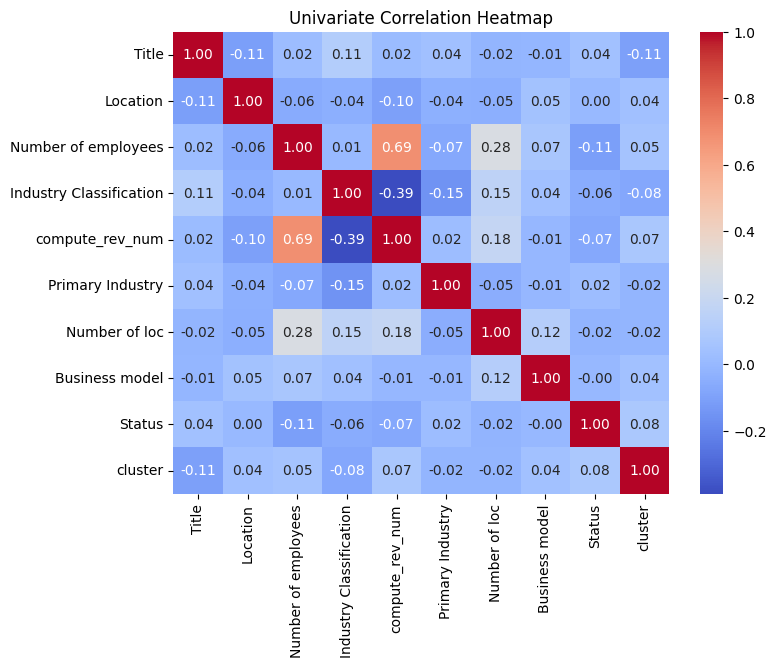

In [86]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Univariate Correlation Heatmap')
plt.show()

## K Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
ck = knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6517857142857143
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.74      0.72        68
         1.0       0.56      0.52      0.54        44

    accuracy                           0.65       112
   macro avg       0.63      0.63      0.63       112
weighted avg       0.65      0.65      0.65       112

Confusion Matrix:
 [[50 18]
 [21 23]]


In [ ]:
print(clf.coef_, clf.intercept_)

## NLP Processing

In [25]:
#data.head()

textual = pd.DataFrame()
textual['TextColumn'] = data[:]['TextColumn']

def preprocess_text(text):
    
    text = re.sub(r'[^a-zA-Z\s]' ,'',text)
    
    text=text.lower()
    
    words = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    #stemmer = PorterStemmer()
    #words = [stemmer.stem(word) for word in words]
    
    cleaned_text = ' '.join(words)
    
    return cleaned_text
    
textual['clean'] = textual['TextColumn'].apply(preprocess_text)

In [26]:
textual.tail()

,TextColumn,clean
552,the leading provider and most widely deployed ...,leading provider widely deployed realtime pers...
553,"the UK’s most accredited, pureplay, Microsoft ...",uks accredited pureplay microsoft partner unpa...
554,"forefront of innovation, Opportunity has been ...",forefront innovation opportunity supporting co...
555,the specialty coffee industry's #1 software so...,specialty coffee industrys software solution c...
556,a trusted IT Services company that supports gr...,trusted services company supports growing ambi...


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(max_features=5,stop_words='english')
tfidf_matrix1 = tfidf_vectorizer.fit_transform(textual['clean'])

# Choose the number of clusters (you may need to experiment)
num_clusters = 10

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix1)

# Add cluster labels to your DataFrame
data['cluster'] = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(tfidf_matrix1, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7142453415490001


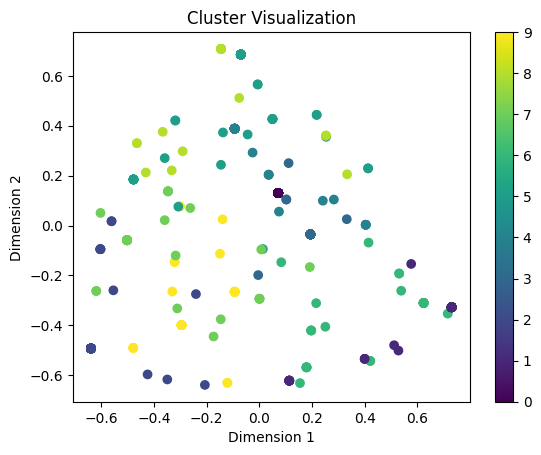

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#labels in 'hc.labels_'

# Reduce dimensionality using PCA
pca = PCA(n_components=2) 
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix1.toarray())

# Reduce dimensionality using t-SNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300)  # Adjust parameters as needed
# tfidf_matrix_2d = tsne.fit_transform(tfidf_matrix.toarray())

# Create a scatter plot of the data points colored by cluster labels
plt.scatter(tfidf_matrix_2d[:, 0], tfidf_matrix_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Cluster Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar()
plt.show()


In [30]:
data.head()

,Title,Location,Number of employees,Industry Classification,compute_rev_num,Primary Industry,Number of loc,Business model,TextColumn,Status,cluster
0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,"a B2B social selling solutions provider, dedic...",0.0,2
1,1.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,"a blockchain infrastructure company, believes ...",1.0,1
2,1.0,4.0,4.0,0.0,3.0,2.0,1.0,1.0,providing professional IT services in developi...,1.0,9
3,1.0,3.0,4.0,0.0,3.0,1.0,3.0,1.0,"innovative, high performing and customer-centr...",0.0,5
4,1.0,3.0,3.0,0.0,2.0,2.0,1.0,1.0,we provide you with a team of two or more digi...,0.0,4


In [38]:
logistic_model = LogisticRegression()
clf = logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

correlation_coeffs = data.corr()['Status']
print(correlation_coeffs)
print(clf.coef_, clf.intercept_)

Accuracy: 0.6071428571428571
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.96      0.75        68
         1.0       0.50      0.07      0.12        44

    accuracy                           0.61       112
   macro avg       0.56      0.51      0.43       112
weighted avg       0.57      0.61      0.50       112

Confusion Matrix:
 [[65  3]
 [41  3]]
Title                      0.043260
Location                   0.003663
Number of employees       -0.109592
Industry Classification   -0.055519
compute_rev_num           -0.074549
Primary Industry           0.019934
Number of loc             -0.022818
Business model            -0.001761
Status                     1.000000
cluster                    0.080503
Name: Status, dtype: float64
[[ 0.09800007 -0.05307758 -0.06635259 -0.4754438  -0.19165932 -0.0084872
   0.04452052  0.12573726  0.06752211]] [-0.19845942]


/var/folders/j6/vkwtdc816h123w9hsn6nsz5r0000gn/T/ipykernel_1447/1648318455.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coeffs = data.corr()['Status']


Random Testing


In [45]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer(max_features=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['TextColumn'])


# Choose the number of clusters (you may need to experiment)
num_clusters = 15
hc = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete')
hc.fit(tfidf_matrix.toarray())

data['clusterh'] = hc.labels_

In [46]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(tfidf_matrix, hc.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.732970119371229


In [ ]:
def get_most_common_words(text, num_words=3):
    if isinstance(text, str):
      words = re.findall(r'\w+', text.lower())  # Tokenize using regular expression
      stop_words = set(stopwords.words("english"))
      filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
      word_freq = Counter(filtered_words)
      return word_freq.most_common(num_words)
    else :
      return []

In [ ]:
data['Top_Words'] = data['Company Description'].apply(get_most_common_words)

In [ ]:
corpus = ' '.join(df['Company Description'].dropna().tolist())
corpus_words = get_most_common_words(corpus, num_words=30)

corpus_words

In [ ]:
data.drop('Filtered_Top_Words', axis=1, inplace=True)

In [ ]:
def preprocess_text(text):
  if isinstance(text, str):
    words = re.findall(r'\w+', text.lower())
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)
  else:
    return ''

In [ ]:
data['filtered_words'] = data['Company Description'].apply(preprocess_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(data['filtered_words'])
count_matrix

In [ ]:
cosine_similarities = cosine_similarity(count_matrix, count_matrix)

In [ ]:
cosine_similarities

In [ ]:
for i in range(len(cosine_similarities)):
  cosine_similarities[i, i] = 0

In [ ]:
highest_similarity_scores = []
highest_similarity_row_numbers = []
status = []

In [ ]:
for i in range(len(cosine_similarities)):
  row_similarities = cosine_similarities[i]
  highest_scores = max(row_similarities)
  highest_row_number = row_similarities.argmax()

  if((data['Status'][highest_row_number] == data['Status'][i])):
    status.append("Yes")
  else:
    status.append("No")

  highest_similarity_scores.append(highest_scores)
  highest_similarity_row_numbers.append(highest_row_number)

In [ ]:
data['Highest_Similarity_Score'] = highest_similarity_scores
data['Most_Similar_Row'] = highest_similarity_row_numbers
data['Status_comparision'] = status

data.head()

In [ ]:
data.to_csv('complete_data_status.csv')

## Neural Network for Traning

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [62]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(9,)),
    #layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)


Epoch 1/5
14/14 [==============================] - 0s 5ms/step - loss: 1.0275 - accuracy: 0.6157 - val_loss: 0.9358 - val_accuracy: 0.6071
Epoch 2/5
14/14 [==============================] - 0s 2ms/step - loss: 0.9352 - accuracy: 0.6180 - val_loss: 0.8634 - val_accuracy: 0.6071
Epoch 3/5
14/14 [==============================] - 0s 2ms/step - loss: 0.8675 - accuracy: 0.6157 - val_loss: 0.8095 - val_accuracy: 0.5982
Epoch 4/5
14/14 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.6067 - val_loss: 0.7709 - val_accuracy: 0.6161
Epoch 5/5
4/4 [==============================] - 0s 780us/step - loss: 0.7423 - accuracy: 0.6071


## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=1900, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.76      0.71        68
         1.0       0.53      0.41      0.46        44

    accuracy                           0.62       112
   macro avg       0.60      0.59      0.59       112
weighted avg       0.61      0.62      0.61       112

Confusion Matrix:
 [[52 16]
 [26 18]]


## Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6071428571428571
Confusion Matrix:
[[50 18]
 [26 18]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.74      0.69        68
         1.0       0.50      0.41      0.45        44

    accuracy                           0.61       112
   macro avg       0.58      0.57      0.57       112
weighted avg       0.60      0.61      0.60       112

